# Investigate gene mentions across publications
- Calculate total gene mentions, most common gene mentions, gene mentions per article and average gene mentions
- Create output figures
- Investigate articles with very high number of gene mentions (>= 20 genes per article)

## 1) Load libraries and datasets

In [49]:
import os
import time
import datetime
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
print("Success!")

Success!


In [ ]:
# Print current working directory
print("Current Working Directory:", os.getcwd())

# Set the working directory and file paths
input_directory = "INPUT_DIRECTORY"
output_directory = "OUTPUT_DIRECTORY"

# Change the working directory
os.chdir(output_directory)
print("Current Working Directory:", os.getcwd())

In [51]:
# Read the CSV file
NER_gene_list = pd.read_csv("ARTICLE_FILE_WITH_EXTRACTED_GENES.csv")
print("\nTotal articles: {:,}".format(len(NER_gene_list)))
print(NER_gene_list)


Total articles: 308,748
           PaperId                                         PaperTitle  \
0       4405900528  Tissue Prior to the Initial Hematoxylin-Eosin ...   
1       4405900803  Detection of urine circulating tumor DNA using...   
2       4405900978  In vitro characterization of some of the anti-...   
3       4405901040  Evaluation of a Novel PLGA-HA-Based Drug Deliv...   
4       4405903794  Network Pharmacology and Molecular Docking Stu...   
...            ...                                                ...   
308743   953699692  GLI-IKBKE Requirement In KRAS-InducedPancreati...   
308744   967707662        Novel Therapeutic Strategies in Lung Cancer   
308745    97124804  Maintaining glucose homeostasis in response to...   
308746    97451996  Anti-Insulin Resistance Treatments Suppress He...   
308747   984969756  Functional analysis of mutations in isocitrate...   

                                                Citations  \
0       2021341670|2053067769|2515067

In [ ]:
os.chdir(input_directory)
print("Current Working Directory:", os.getcwd())
oncomine_df = pd.read_csv("oncomine_ngs_panel.csv", header=None)
print("Oncomine DataFrame:\n", oncomine_df)
print("Total Rows in oncomine_df:", len(oncomine_df))

# Change to output directory
os.chdir(output_directory)
print("Current Working Directory:", os.getcwd())

## 2) Calculate gene mentions

In [53]:
# Summing the columns specified in oncomine_df and ranking them
relevant_columns = oncomine_df.iloc[:, 0].tolist()
column_sums = NER_gene_list[relevant_columns].sum().sort_values(ascending=False)
column_sums_formatted = column_sums.apply(lambda x: f"{x:,.0f}")

total_mentions = NER_gene_list['Sum_Gene_Mentions'].sum()
average_mentions = NER_gene_list['Sum_Gene_Mentions'].mean()

mentions_distribution = NER_gene_list['Sum_Gene_Mentions'].value_counts().sort_index()

mentions_distribution_formatted = mentions_distribution.apply(lambda x: f"{x:,}")

print("\nRanking of column sums from oncomine_df:\n")
print(column_sums_formatted.to_string())

print("\nTop 10 genes mentioned the most:\n")
print(column_sums_formatted.head(10).to_string())

print("\nTotal articles: {:,}".format(len(NER_gene_list)))
print("Total sum of 'Sum_Gene_Mentions': {:,}".format(total_mentions))
print("Average number of gene mentions per article: {:,.2f}".format(average_mentions))

print("\nDistribution of Sum_Gene_Mentions counts:\n")
print(mentions_distribution_formatted.to_string())


Ranking of column sums from oncomine_df:

TP53        50,138
EGFR        43,816
AKT1        34,337
MTOR        19,864
KRAS        19,364
MAPK1       16,412
MYC         16,396
BRAF        16,210
STAT3       16,037
PTEN        12,652
BRCA1       11,670
HRAS        10,542
AR           9,943
ALK          9,453
PIK3CA       8,731
BRCA2        8,265
MET          7,914
CDK4         7,532
NOTCH1       7,341
IDH1         7,074
NF2          6,689
ERBB2        6,453
ATM          5,808
JAK1         5,128
CDK2         5,036
CDKN2A       5,030
KIT          4,729
FGFR1        4,466
MDM2         4,438
TERT         4,436
SRC          4,322
NRAS         4,192
EZH2         4,092
ESR1         4,091
ARAF         3,940
PPARG        3,828
SMAD4        3,810
RET          3,758
PDGFRA       3,739
IGF1R        3,551
RB1          3,424
MLH1         3,420
MSH2         3,228
CDK12        3,171
NF1          3,115
ROS1         2,963
CCND1        2,706
CHEK2        2,680
JAK2         2,674
RHOA         2,593
MSH6   

## 3) Create figure and overview of gene mentions

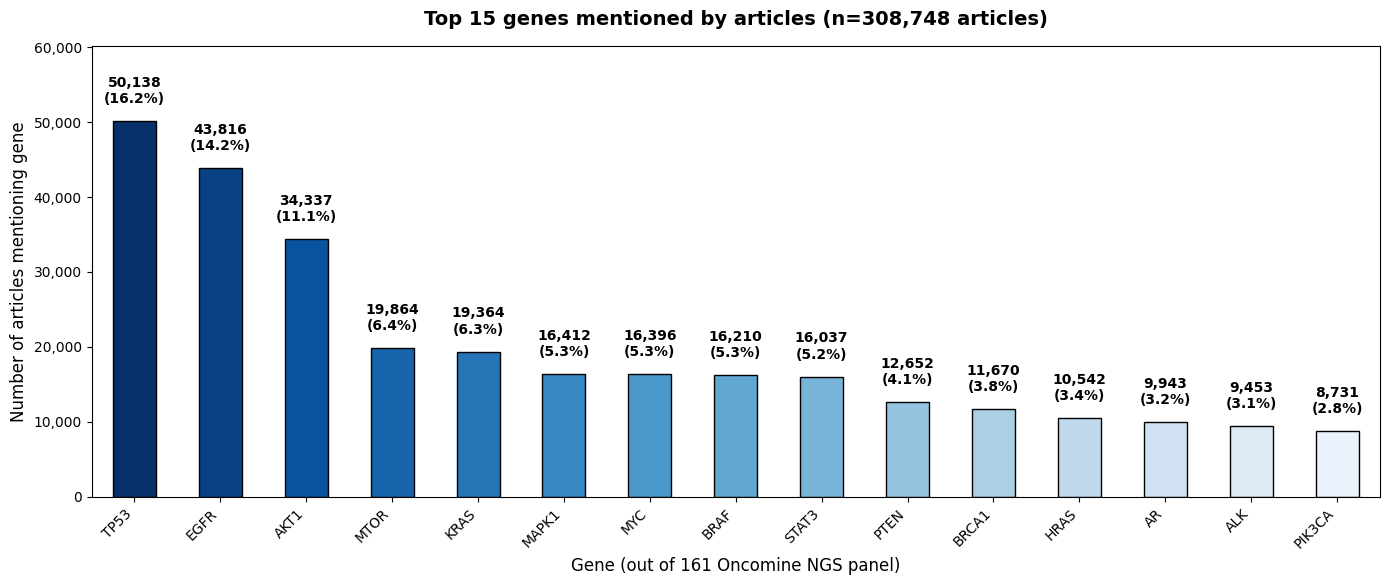

In [54]:
# Figure 1: Bar chart for ranking of summed relevant columns

%matplotlib inline  
fig, ax = plt.subplots(figsize=(14, 7))

# Sorting and calculating percentages
top_genes = column_sums.sort_values(ascending=False).head(15)
total_articles = len(NER_gene_list)
percentages = (top_genes / total_articles) * 100
average_mentions = column_sums.sum() / total_articles 

# Color gradient
colors = [plt.cm.Blues(1 - (i / len(top_genes))) for i in range(len(top_genes))]

# Plot the bar chart
bars = top_genes.plot(kind='bar', color=colors, edgecolor='black', ax=ax)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.set_ylim(0, top_genes.max() * 1.2) 
for bar, value, percent in zip(bars.patches, top_genes, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + (top_genes.max() * 0.04), 
        f"{int(value):,}\n({percent:.1f}%)", 
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
    )

# Titles and labels in sentence case
ax.set_title(f'Top 15 genes mentioned by articles (n={total_articles:,.0f} articles)', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_ylabel('Number of articles mentioning gene', fontsize=12)
ax.set_xlabel('Gene (out of 161 Oncomine NGS panel)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
fig.tight_layout(rect=[0, 0.05, 1, 0.9])
plt.show()

/tmp/ipykernel_2697353/947276335.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mentions_distribution.index, y=mentions_distribution.values,


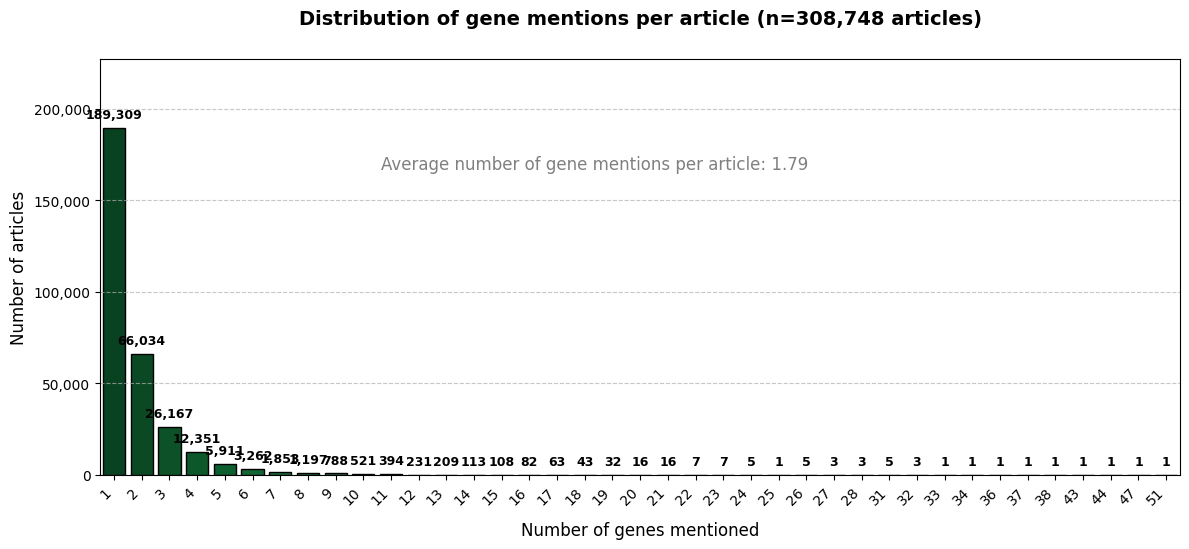

In [55]:
# Figure 2: Improved Plot for Sum_Gene_Mentions Distribution
%matplotlib inline  
fig, ax = plt.subplots(figsize=(12, 7))

# Create bar plot with green gradient colors
colors = sns.color_palette("Greens_r", len(mentions_distribution))  
ax = sns.barplot(x=mentions_distribution.index, y=mentions_distribution.values, 
                 palette=colors, edgecolor='black')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.set_title(f'Distribution of gene mentions per article (n={total_articles:,.0f} articles)', 
             fontsize=14, fontweight='bold', pad=25)
plt.figtext(0.5, 0.6, f'Average number of gene mentions per article: {average_mentions:,.2f}', 
            fontsize=12, color='gray', ha='center')
ax.set_xlabel('Number of genes mentioned', fontsize=12, labelpad=10)
ax.set_ylabel('Number of articles', fontsize=12)
ax.set_xticks(range(len(mentions_distribution.index)))
ax.set_xticklabels(mentions_distribution.index, rotation=45, ha='right', fontsize=10)
ax.set_ylim(0, max(mentions_distribution.values) * 1.2)
ax.grid(axis='y', linestyle='--', alpha=0.7)
for bar, value in zip(ax.patches, mentions_distribution.values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + (max(mentions_distribution.values) * 0.02),  
        f"{value:,}",
        ha='center', va='bottom', fontsize=9, fontweight='bold', color='black'
    )
fig.tight_layout(rect=[0, 0.05, 1, 0.85])
plt.show()

## 4) Investigate high numbers of gene mentions in PaperTitle and Abstracts

In [56]:
# Filter the dataset where 'Sum_Gene_Mentions' is greater than 20
high_gene_mentions_df = NER_gene_list[NER_gene_list['Sum_Gene_Mentions'] > 20]

high_gene_mentions_df = high_gene_mentions_df[['PaperTitle', 'Abstract', 'Sum_Gene_Mentions']]
high_gene_mentions_df = high_gene_mentions_df.sort_values(by='Sum_Gene_Mentions', ascending=False)
count_above_20 = len(high_gene_mentions_df)

output_file = "high_gene_mentions.txt"

with open(output_file, "w", encoding="utf-8") as f:
    f.write(f"Total number of rows where Sum_Gene_Mentions > 20: {count_above_20}\n\n")
    f.write(high_gene_mentions_df.to_string(index=False))

print(f"\nFiltered and sorted dataset saved to {output_file}")
print(f"\nTotal number of articles where Sum_Gene_Mentions > 20: {count_above_20} articles\n\n")
print(high_gene_mentions_df)


Filtered and sorted dataset saved to high_gene_mentions.txt

Total number of articles where Sum_Gene_Mentions > 20: 64 articles


                                               PaperTitle  \
276959  Driver-target-drug algorithm in the interpreta...   
270618  2414: Novel, ultra deep next-generation sequen...   
202732  Seventeen percent of NGS 50 gene panel variant...   
283297  Molecular profiling of neuroendocrine tumors (...   
51614   1411: Different treatment response in several ...   
...                                                   ...   
227904  Profiling circulating tumor (ct)DNA mutations ...   
253230  Comprehensive Genomic Profiling Facilitates Im...   
248920  2266: Molecular and genomic characterization o...   
294344  Elderly Former Smoker with HRAS Mutant NonSmal...   
304917  Next-generation sequencing in pancreatic cance...   

                                                 Abstract  Sum_Gene_Mentions  
276959  e22069 Background: The standardized integratio...

#### Check dataset and varify all articles with high gene mentions
--> Here, all n=64 articles have valid mentions of genes in their abstracts.